In [60]:
'''
Data sets for all 11 stellar halo models at:
http://www.astro.columbia.edu/~kvj/halos/ Files - halo??.dat: 
========================================================================================
Each file is an ascii list of all particles that have light associated with them, 
columns: nsat, x, y, z, vx, vy, vz, tub, pint, pext, age, fe/h, alpha/fe, mass - 

nsat gives satellites number from which particle came - 
positions in kpc (relative to Milky-Way-type parent) - 
velocities in km/s - 
tub = time at which particle became unbound from sat for first time (=0 if still bound) - 
pint = potential energy due to satellite particles in (km/s)^2 - 
ptot = total potential energy - 
age of stars in Gyrs - 
stellar mass associated with particle in msun -
========================================================================================
If you do end up using these versions in pubs, please quote Bullock & Johnston (2005) 
and also Robertson et al (2005) and Font et al (2006) (also on the WWW site)
'''
def display(arr_list):
    for name, arr in arr_list:
        print name
        print '-----------------------'
        print 'min  :' + str(round(arr.min(), 2))
        print 'mean :' + str(round(arr.mean(), 2))
        print 'max  :' + str(round(arr.max(), 2))
        print 'std  :' + str(round(arr.std(), 2))
        print 'len  :' + str(len(arr.flatten()))
        print '-----------------------\n'


### import

In [1]:
import os
import numpy as np
from astropy.table import Table
from matplotlib import pyplot as plt

### load

In [70]:
halos = [f.split('.')[0] for f in os.listdir('./') if f.endswith('.dat')]
#halos.reverse()
halo = halos[3]
#np.loadtxt(fname, dtype=<type 'float'>, comments='#', delimiter=None, 
#           converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
px, py, mass = np.loadtxt(fname='./' + halo + '.dat', dtype=np.float32, unpack=True, usecols=[1, 2, 13], ndmin=2)
rmax = 300.
rlim = np.nonzero(
    np.logical_and(
        np.logical_and(
            px <= rmax, 
            px >= -rmax),
        np.logical_and(
            py <= rmax, 
            py >= -rmax)))[0]
px = px[rlim]
py = py[rlim]
display([('px', px), ('py', py), ('mass', mass)])

px
-----------------------
min  :-299.98
mean :-1.16
max  :299.98
std  :43.57
len  :2653888
-----------------------

py
-----------------------
min  :-299.99
mean :-0.8
max  :300.0
std  :52.97
len  :2653888
-----------------------

mass
-----------------------
min  :0.04
mean :1127.75
max  :867970.0
std  :9696.6
len  :2843205
-----------------------



### check

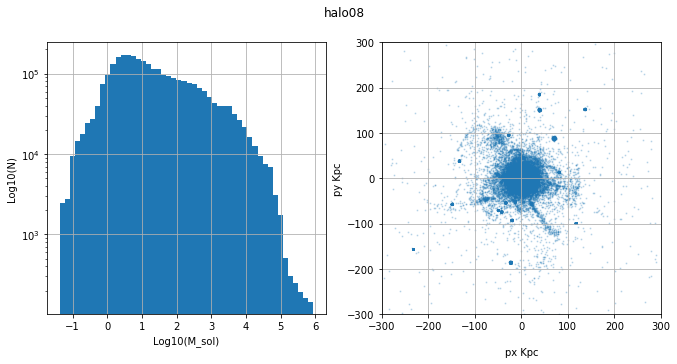

In [71]:
fig = plt.figure(figsize=(11,5))
fig.suptitle(halo)
hst = fig.add_subplot(121)
#plt.hist(x, bins=None, range=None, normed=False, 
#         weights=None, cumulative=False, bottom=None, 
#         histtype=u'bar', align=u'mid', orientation=u'vertical', 
#         rwidth=None, log=False, color=None, label=None, 
#         stacked=False, hold=None, data=None, **kwargs)
hst.hist(x=np.log10(mass), bins=50, log=True)
hst.set_xlabel('Log10(M_sol)')
hst.set_ylabel('Log10(N)')
hst.axes.grid()

ax = fig.add_subplot(122)
ax.scatter(px[::70], py[::70], s=1, alpha=.2)
ax.set_xlabel('\npx Kpc')
ax.set_ylabel('\npy Kpc')
ax.set_xlim([-300, 300])
ax.set_ylim(ax.get_xlim())
ax.axes.grid()
plt.show()

### bin function

In [81]:
def bin_data(data=None, grid_x=601, grid_y=601, grid_dtype=np.float32):
    
    # make empty grid array.
    _grid = np.zeros(shape=(int(grid_y), int(grid_x), 1), dtype=grid_dtype)
    if not data:
        return _grid
    badx = 0
    bady = 0
    _px, _py, _mass = data
    for i in xrange(0, len(px), 1):
        xcenter = grid_x/2
        ycenter = grid_y/2
        _x = int(_px[i] + xcenter)
        _y = int(_py[i] + ycenter)
        if _x > grid_x:
            badx += 1
            continue
        if _y > grid_y:
            bady += 1
            continue
        _grid[_y, _x, 0] += _mass[i]
    return _grid

In [82]:
grid = bin_data([px, py, mass])
display([('mass', grid)])

## plot

In [143]:
def fix_rslice(arr):
    grid = np.zeros_like(arr)
    center = arr.shape[0]/2
    for i in range(grid.shape[0]):
        for q in range(grid.shape[1]):
            value = np.sqrt((
                np.square(i - center) +
                np.square(q - center)))
            grid[i, q, 0] = value
    return grid

In [156]:
_levels = range(0, 400, 50)

C:\Users\swc21\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in log10


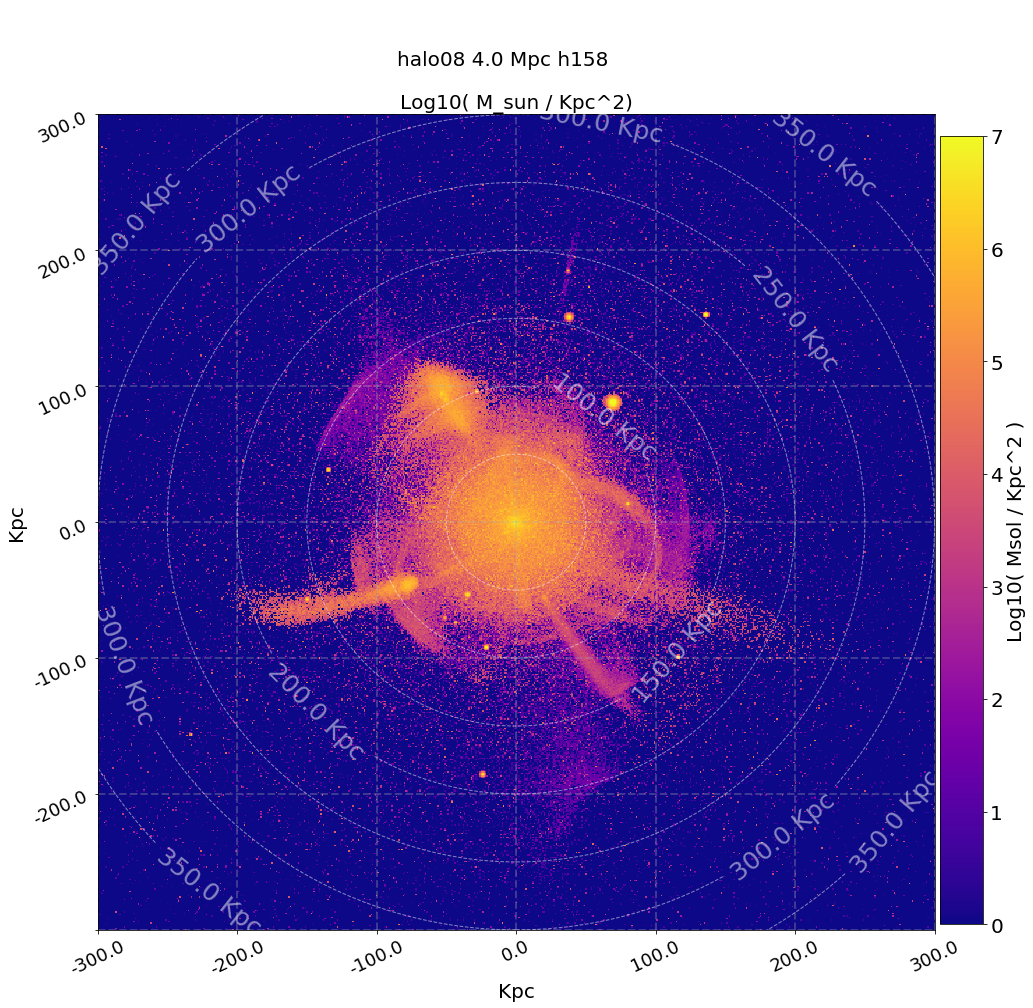

In [168]:
fig = plt.figure(figsize=(15, 15))
fig.suptitle('\n\n' + halo + ' 4.0 Mpc h158', fontsize=20)
ax = fig.add_subplot(111)
ax.set_title('Log10( M_sun / Kpc^2)', fontsize=20)
hm = ax.pcolormesh(np.log10(grid[:, :, 0]), cmap=plt.cm.plasma, vmin=0.0, vmax=7.0)

cp = ax.contour(fix_rslice(grid)[:, :, 0], _levels, colors='white',
                linewidths=1, alpha=.5, linestyles='dashed')
ax.clabel(cp, _levels, inline=1, fmt='%s Kpc',
          fontsize=25, color='white', linewidth=7, alpha=1)

ax.set_xlim([0, 600])
ax.set_ylim(ax.get_xlim())

ax.set_xlabel('Kpc', fontsize=20)
ax.set_ylabel(ax.get_xlabel(), fontsize=20)
ticks = [str(i) for i in ax.get_xticks() - 300.0]
ax.set_xticklabels(ticks, rotation=25, size=18)
ax.set_yticklabels([''] + ticks[1:], rotation=25, size=18)
ax.axes.grid(linestyle='dashed', linewidth=2, alpha=.3)

ax1 = fig.add_axes([.905, 0.13, .04, .73])
cb = plt.colorbar(hm, ax1)
cb.ax.tick_params(labelsize=20)
cb.set_label('Log10( Msol / Kpc^2 )', fontsize=20)

plt.show()
fig.savefig('./MassHeatMap.png', dpi=400)